In [5]:
# Timeseries unlike normal lin.regression does not assume that each observation is indp.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import datetime
rcParams['figure.figsize'] = 15, 6

In [4]:
cd Desktop\python_excel

C:\Users\fbaker\Desktop\python_excel


In [6]:
data = pd.read_csv('visitor_traffic.csv')
data.head()


,visit_date,returning_customer_flag,option_feature_shipped,option_seen,detail_seen,conversion_rate
0,2016-11-24,RC,0,523,511,0.9770
1,2016-11-30,RC,0,632,604,0.9556
2,2017-01-31,NC,0,1368,621,0.4539
3,2015-12-08,RC,0,238,213,0.8949
4,2016-03-24,RC,0,352,332,0.9431


In [17]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('visitor_traffic.csv', parse_dates=['visit_date'], index_col='visit_date',date_parser=dateparse)


,returning_customer_flag,option_feature_shipped,option_seen,detail_seen,conversion_rate
visit_date,,,,,
2017-01-31,NC,0,1368,621,0.4539
2015-10-25,NC,0,634,344,0.5425
2015-11-05,NC,0,858,485,0.5652
2015-07-24,NC,0,807,525,0.6505
2016-07-15,NC,0,665,414,0.6225


In [13]:
data.index

DatetimeIndex(['2016-11-24', '2016-11-30', '2017-01-31', '2015-12-08',
               '2016-03-24', '2015-10-25', '2015-11-05', '2017-05-30',
               '2015-09-14', '2017-01-24',
               ...
               '2015-08-14', '2015-07-23', '2015-11-17', '2016-03-06',
               '2015-07-01', '2016-01-17', '2015-10-11', '2015-08-25',
               '2016-04-10', '2015-10-25'],
              dtype='datetime64[ns]', name='visit_date', length=1556, freq=None)

C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  app.launch_new_instance()
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).std()


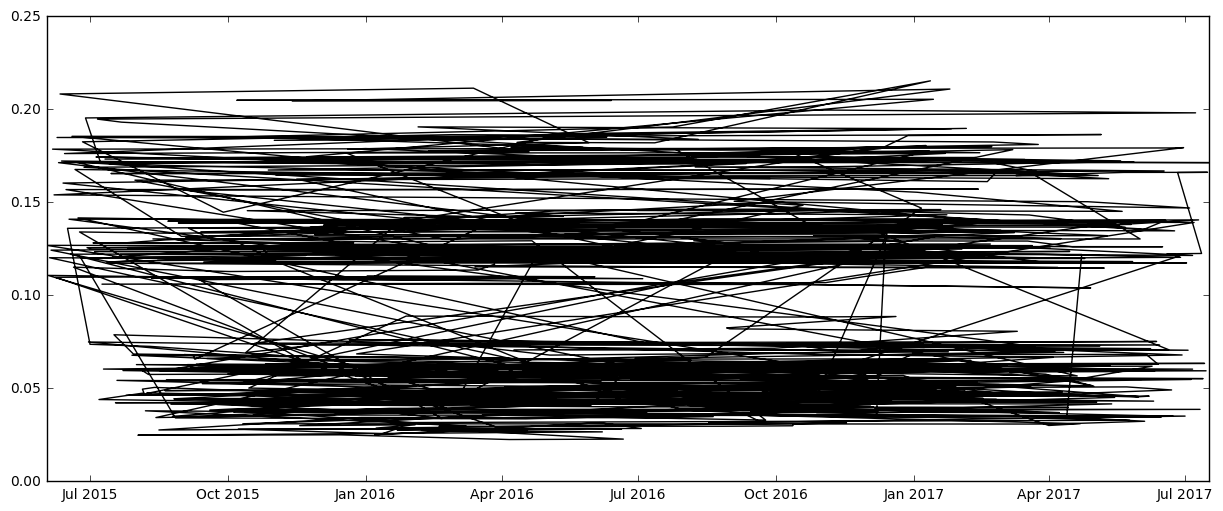

In [19]:
ts=data['visitors']

rolmean = pd.rolling_mean(ts, window=24)
rolstd = pd.rolling_std(ts, window=14)

#plt.plot(ts, color='blue',label='Original')
#plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')



In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()


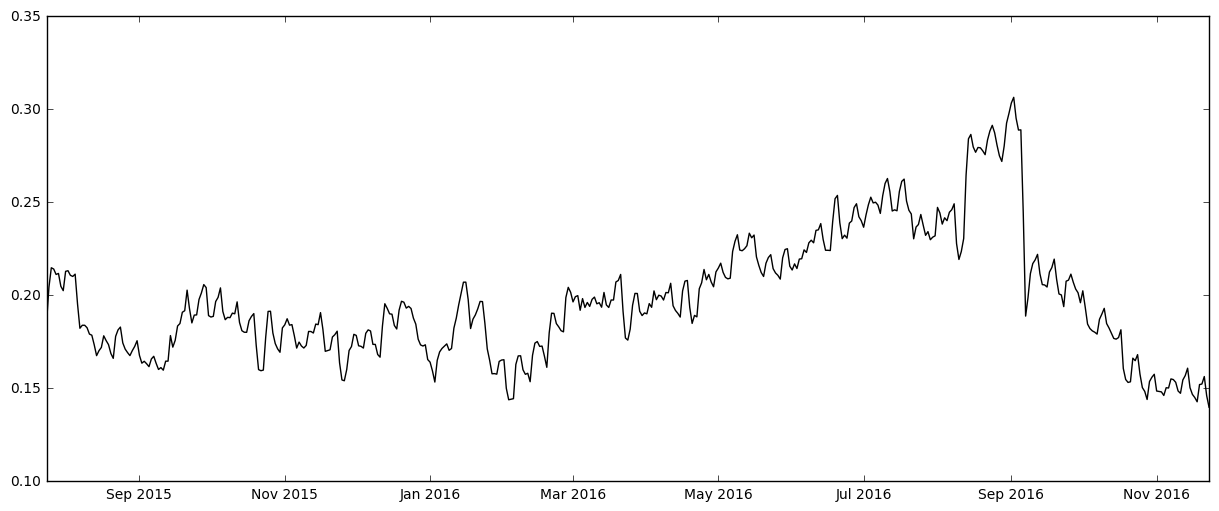

In [18]:
# Stationarity is defined using very strict criterion. 
# However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

# 1.constant mean
# 2.constant variance
# 3.an autocovariance that does not depend on time.

#almost none of practical time series are stationary. 
#statisticians have figured out ways to make series stationary, which we’ll discuss now. 
#Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

#One of the first tricks to reduce trend can be transformation. 
#For example, in this case we can clearly see thatthere is a significant positive trend. 
#So we can apply transformation which penalize higher values more than smaller values. 
#These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

ts_log=np.log(ts)

standev = pd.rolling_std(ts_log, window=24)
moving_avg = pd.rolling_mean(ts_log,24)

#plt.plot(ts_log, color='blue')
#plt.plot(moving_avg, color='red')
plt.plot(standev, color='black')

C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


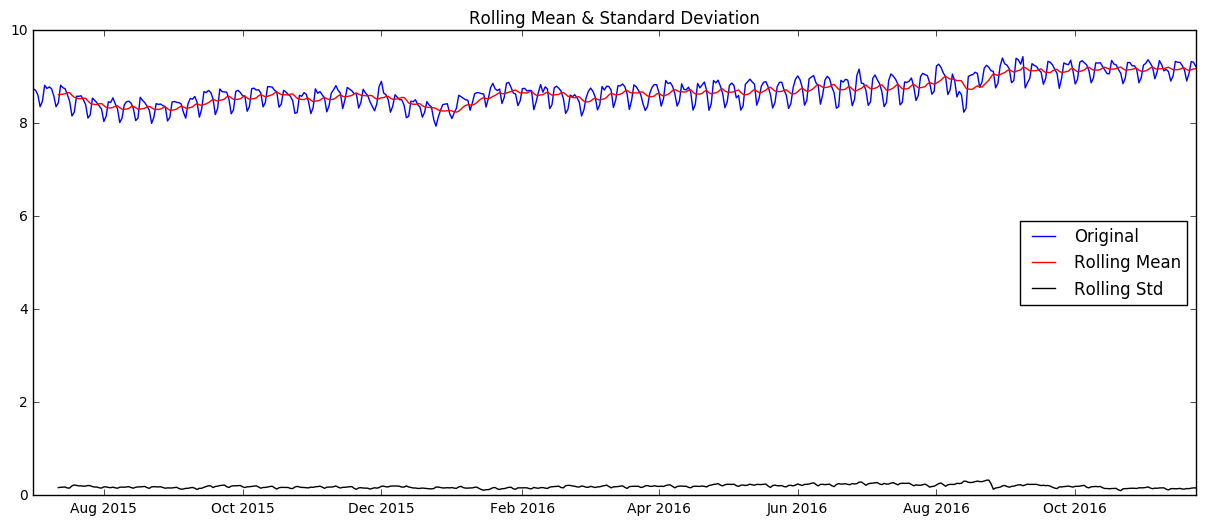

Results of Dickey-Fuller Test:
Test Statistic                  -0.823459
p-value                          0.812134
#Lags Used                      15.000000
Number of Observations Used    496.000000
Critical Value (5%)             -2.867385
Critical Value (1%)             -3.443603
Critical Value (10%)            -2.569883
dtype: float64


In [19]:
test_stationarity(ts_log)

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg 
ts_log_moving_avg_diff.dropna(inplace=True) #drops NaN at the start of the moving average 
ts_log.dropna(inplace=True) #drops NaN at the start of the moving average 



C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=24,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


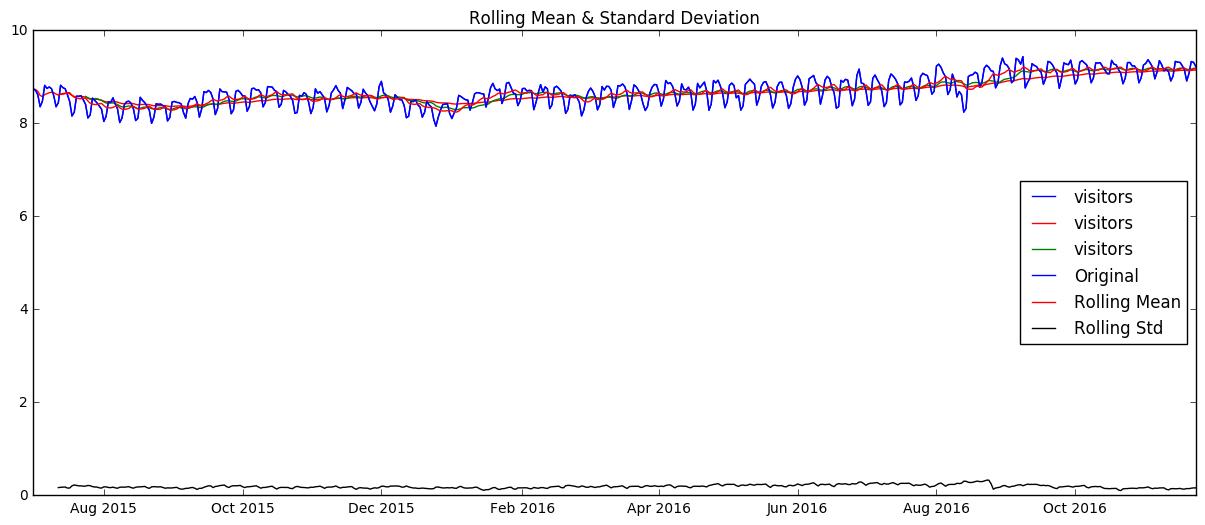

Results of Dickey-Fuller Test:
Test Statistic                  -0.823459
p-value                          0.812134
#Lags Used                      15.000000
Number of Observations Used    496.000000
Critical Value (5%)             -2.867385
Critical Value (1%)             -3.443603
Critical Value (10%)            -2.569883
dtype: float64


In [21]:
expwighted_avg = pd.ewma(ts_log, halflife=24) #Exponential weighted avereage
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.plot(moving_avg, color='green')
#plt.plot(ts_log_moving_avg_diff, color='green')

test_stationarity(ts_log)

C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
C:\Users\fbaker\AppData\Local\Continuum\Anaconda3\envs\python27\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()


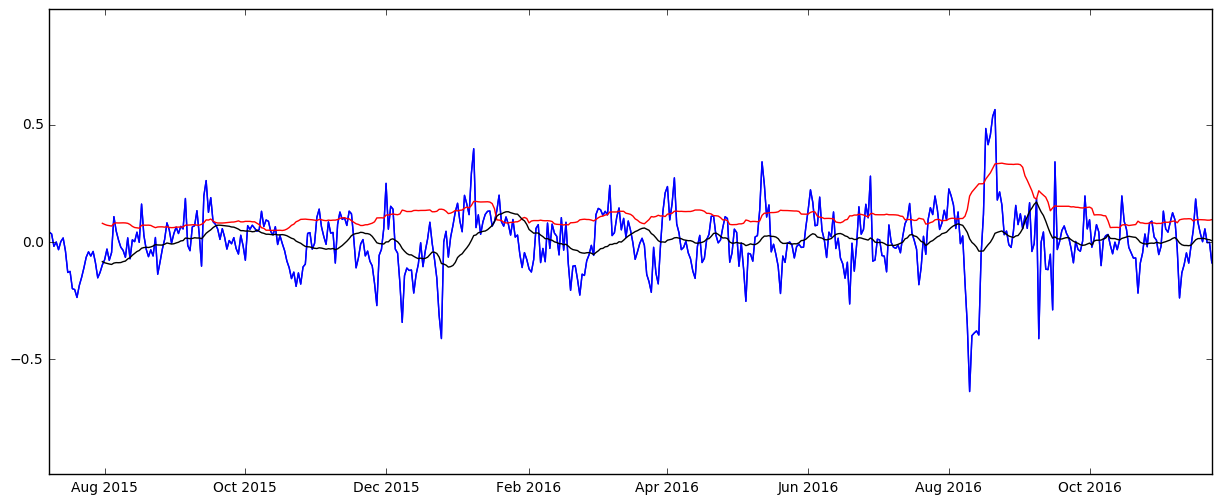

In [22]:
ts_log_diff = ts_log - ts_log.shift(7)
plt.plot(ts_log_diff)

standev = pd.rolling_std(ts_log_diff, window=24)
moving_avg = pd.rolling_mean(ts_log_diff,24)

plt.ylim(ymax=0.99,ymin=-0.99)
plt.plot(ts_log_diff, color = 'blue')
plt.plot(standev, color = 'red')
plt.plot(moving_avg, color = 'black')

In [13]:
# ARMIA Model: Auto-Regressive Integrated Moving Averages
#The predictors depend on the parameters (p,d,q) of the ARIMA model: 
#
#  1.Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. 
#                For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
#  2.Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. 
#               For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
#  3.Number of Differences (d): These are the number of nonseasonal differences, 
#            i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.



#  1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. 
#                 For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
#  2. Partial Autocorrelation Function (PACF): This measures the correlation between the 
#                TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. 
#                Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

#ACF and PACF plots:


ValueError: freq D not understood. Please report if you think this in error.

In [23]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: freq D not understood. Please report if you think this in error.

NameError: name 'predictions_ARIMA_diff' is not defined

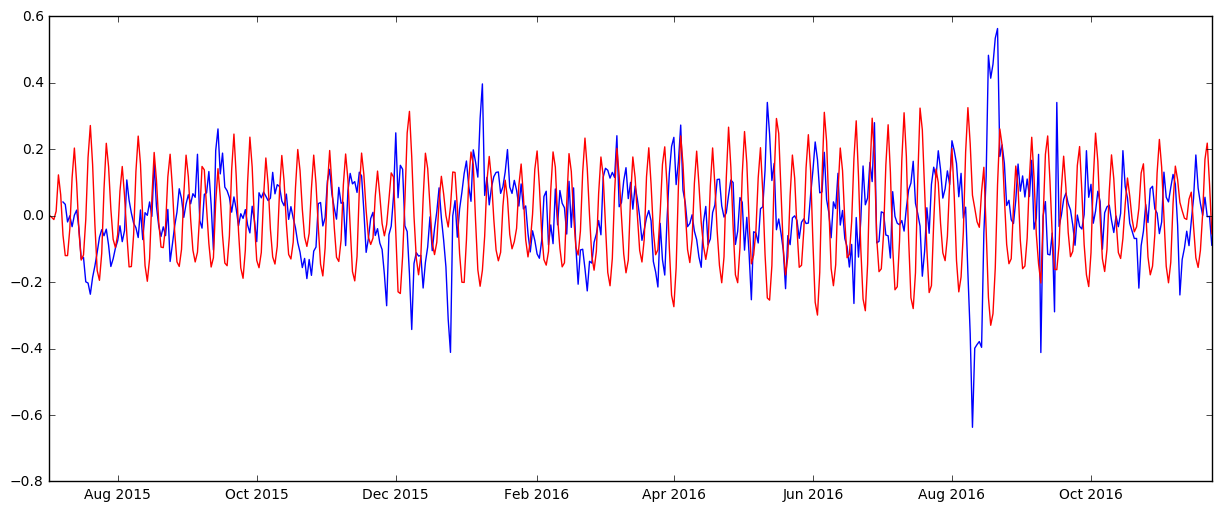

In [24]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [25]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

NameError: name 'predictions_ARIMA_diff' is not defined